# Weather service data export around Porijõgi catchment

- Ilmateenistus
- many different variables, joint with station location
- exported in prepprocess dataframe `pori_climate_data1.parquet`

In [194]:
import pandas as pd
import numpy as np
import os

import openpyxl
from datetime import datetime

import folium
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd

import dask
import xarray as xr

In [195]:
t1 = pd.read_excel("2-10_21_187_Tartu Ülikool_Alexander Kmoch.xlsx", engine='openpyxl')
t2 = pd.read_excel("Min_max_temp_Tel2-10_21_240_Alexander Kmoch.xlsx", engine='openpyxl')

dats = [t1, t2]
# sheet_name=0, header=0, names=None, index_col=None, 
t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11690 entries, 0 to 11689
Data columns (total 47 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11689 non-null  object 
 1   Unnamed: 1   11689 non-null  object 
 2   Unnamed: 2   11689 non-null  object 
 3   Unnamed: 3   11659 non-null  object 
 4   Unnamed: 4   11652 non-null  object 
 5   Unnamed: 5   10162 non-null  object 
 6   Unnamed: 6   11682 non-null  object 
 7   Unnamed: 7   8986 non-null   object 
 8   Unnamed: 8   7601 non-null   object 
 9   Unnamed: 9   7601 non-null   object 
 10  Unnamed: 10  11645 non-null  object 
 11  Unnamed: 11  11644 non-null  object 
 12  Unnamed: 12  11690 non-null  object 
 13  Unnamed: 13  11689 non-null  object 
 14  Unnamed: 14  11690 non-null  object 
 15  Unnamed: 15  11690 non-null  object 
 16  Unnamed: 16  11627 non-null  object 
 17  Unnamed: 17  7283 non-null   object 
 18  Unnamed: 18  7282 non-null   object 
 19  Unna

In [196]:
t1.head(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,NaN,NaN,NaN,JÕGEVA,JÕGEVA,JÕGEVA,JÕGEVA,JÕGEVA,JÕGEVA,JÕGEVA,...,PIIGASTE,PRAAGA,PRAAGA,REOLA,TARTU-KVISSENTALI,TÕRVE,TÕRVE,OTEPÄÄ,OTEPÄÄ,NaN
1,AASTA,KUU,PÄEV,Öööpäeva sademete summa (mm),Ööpäeva keskmine suhteline õhuniiskus (%),Ööpäeva päikese paiste kestus (tundides),Ööpäeva keskmine õhutemperatuur (℃),Met.ööp. keskm. maap. Temp (℃),Möp keskm pinnasetemp -10cm (℃),Möp keskm pinnasetemp -20cm (℃),...,Ööpäeva keskmine õhutemperatuur (℃),Öööpäeva sademete summa (mm),Ööpäeva keskmine õhutemperatuur (℃),Ööpäeva keskmine õhutemperatuur (℃),Ööpäeva keskmine õhutemperatuur (℃),Öööpäeva sademete summa (mm),Ööpäeva keskmine õhutemperatuur (℃),Öööpäeva sademete summa (mm),Ööpäeva keskmine õhutemperatuur (℃),NaN
2,1989,1,1,0.2,83,1.4,-10.1,-11.9,NaN,NaN,...,NaN,0,NaN,NaN,NaN,0.3,NaN,NaN,NaN,NaN


In [197]:
t2.head(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,NaN,NaN,NaN,JÕGEVA,JÕGEVA,JÕGEVA,JÕGEVA,JÕGEVA,JÕGEVA,JÕGEVA,...,TARTU-ÜLENURME,TARTU-ÜLENURME,TARTU-ÜLENURME,TARTU-ÜLENURME,TARTU-ÜLENURME,TARTU-ÜLENURME,TARTU-ÜLENURME,OTEPÄÄ,OTEPÄÄ,OTEPÄÄ
1,AASTA,KUU,PÄEV,Ööpäeva keskmine õhutemp (℃),Ööpäeva madalaim õhutemp (℃),Ööpäeva kõrgeim õhutemp (℃),Ööp. keskm. maapinna temp. (℃),Ööpäeva keskm pinnase temp -10cm sügavusel (℃),Ööpäeva keskm pinnase temp -20cm sügavusel (℃),Ööp. maap. temp. abs. Miinimum (℃),...,Ööpäeva madalaim õhutemp (℃),Ööpäeva kõrgeim õhutemp (℃),Ööp. keskm. maapinna temp. (℃),Ööpäeva keskm pinnasetemp -10cm sügavusel (℃),Ööpäeva keskm pinnasetemp -20cm sügavusel (℃),Ööp. maap. temp. abs. Miinimum (℃),Ööp. maap. temp. abs. maksimum (℃),Ööpäeva keskmine õhutemp (℃),Ööpäeva madalaim õhutemp (℃),Ööpäeva kõrgeim õhutemp (℃)
2,1987,1,1,-13.5,-15.6,-10.9,NaN,NaN,NaN,NaN,...,-18.3,-13.2,-14.4,NaN,NaN,-20.6,-11.1,NaN,NaN,NaN


In [198]:
def skip_types(s):
    t = s
    redundants = [ 'Öööpäeva','Ööpäeva', 'Met.ööp.', 'Möp', 'Ööp.']
    for r in redundants:
        t = t.replace(r, '')
    return t


ascii_lookup = {
    'ä': 'a',
    'õ': 'o',
    'ö': 'o',
    'ü': 'u',
    '-': '_',
    '(': '',
    ')': '',
    ' ': '_',
    '.': '',
    '℃': 'degC',
    '%': 'pct',
    '/': '_'
}

def ascii_sanitize(s):
    a = skip_types(s)
    a = a.lower()
    for c in a:
        if c in ascii_lookup.keys():
            a = a.replace(c, ascii_lookup.get(c, c))
    return a

In [199]:
for idx, tdf in enumerate(dats):
    # AASTA 	KUU 	PÄEV
    tdf = tdf.rename(columns={'Unnamed: 0': 'year', 'Unnamed: 1': 'month', 'Unnamed: 2': 'day'})

    for cx in range(3, len(tdf.columns)):
        s1 = tdf.iloc[0, cx]
        s2 = tdf.iloc[1, cx]
        n = ascii_sanitize(f"{s1} {s2}")
        print(n)
        tdf = tdf.rename(columns={f"Unnamed: {cx}": n})
    if 'nan_nan' in tdf.columns:
        tdf = tdf.drop(columns=['nan_nan'])
    dats[idx] = tdf

t1 = dats[0]
t2= dats[1]

jogeva__sademete_summa_mm
jogeva__keskmine_suhteline_ohuniiskus_pct
jogeva__paikese_paiste_kestus_tundides
jogeva__keskmine_ohutemperatuur_degC
jogeva__keskm_maap_temp_degC
jogeva__keskm_pinnasetemp__10cm_degC
jogeva__keskm_pinnasetemp__20cm_degC
jogeva__keskmine_tuule_kiirus_m_s
jogeva__makimsaalne_tuule_puhang_m_s
toravere__sademete_summa_mm
toravere__keskmine_suhteline_ohuniiskus_pct
toravere__paikese_paiste_kestus_tundides
toravere__keskmine_ohutemperatuur_degC
toravere__keskm_maap_temp_degC
toravere__keskm_pinnasetemp__10cm_degC
toravere__keskm_pinnasetemp__20cm_degC
toravere__keskmine_tuule_kiirus_m_s
toravere__makimsaalne_tuule_puhang_m_s
tiirikoja__sademete_summa_mm
tiirikoja__keskmine_suhteline_ohuniiskus_pct
tiirikoja__paikese_paiste_kestus_tundides
tiirikoja__keskmine_ohutemperatuur_degC
tiirikoja__keskm_maap_temp_degC
tiirikoja__keskm_pinnasetemp__10cm_degC
tiirikoja__keskm_pinnasetemp__20cm_degC
tiirikoja__keskmine_tuule_kiirus_m_s
tiirikoja__makimsaalne_tuule_puhang_m_s
a

In [200]:
t1.head(5)

,year,month,day,jogeva__sademete_summa_mm,jogeva__keskmine_suhteline_ohuniiskus_pct,jogeva__paikese_paiste_kestus_tundides,jogeva__keskmine_ohutemperatuur_degC,jogeva__keskm_maap_temp_degC,jogeva__keskm_pinnasetemp__10cm_degC,jogeva__keskm_pinnasetemp__20cm_degC,...,piigaste__sademete_summa_mm,piigaste__keskmine_ohutemperatuur_degC,praaga__sademete_summa_mm,praaga__keskmine_ohutemperatuur_degC,reola__keskmine_ohutemperatuur_degC,tartu_kvissentali__keskmine_ohutemperatuur_degC,torve__sademete_summa_mm,torve__keskmine_ohutemperatuur_degC,otepaa__sademete_summa_mm,otepaa__keskmine_ohutemperatuur_degC
0,NaN,NaN,NaN,JÕGEVA,JÕGEVA,JÕGEVA,JÕGEVA,JÕGEVA,JÕGEVA,JÕGEVA,...,PIIGASTE,PIIGASTE,PRAAGA,PRAAGA,REOLA,TARTU-KVISSENTALI,TÕRVE,TÕRVE,OTEPÄÄ,OTEPÄÄ
1,AASTA,KUU,PÄEV,Öööpäeva sademete summa (mm),Ööpäeva keskmine suhteline õhuniiskus (%),Ööpäeva päikese paiste kestus (tundides),Ööpäeva keskmine õhutemperatuur (℃),Met.ööp. keskm. maap. Temp (℃),Möp keskm pinnasetemp -10cm (℃),Möp keskm pinnasetemp -20cm (℃),...,Öööpäeva sademete summa (mm),Ööpäeva keskmine õhutemperatuur (℃),Öööpäeva sademete summa (mm),Ööpäeva keskmine õhutemperatuur (℃),Ööpäeva keskmine õhutemperatuur (℃),Ööpäeva keskmine õhutemperatuur (℃),Öööpäeva sademete summa (mm),Ööpäeva keskmine õhutemperatuur (℃),Öööpäeva sademete summa (mm),Ööpäeva keskmine õhutemperatuur (℃)
2,1989,1,1,0.2,83,1.4,-10.1,-11.9,NaN,NaN,...,0.2,NaN,0,NaN,NaN,NaN,0.3,NaN,NaN,NaN
3,1989,1,2,0.4,88,0,-15.7,-16.9,NaN,NaN,...,0.3,NaN,0,NaN,NaN,NaN,0.4,NaN,NaN,NaN
4,1989,1,3,1.3,95,1.6,1.5,-0.1,NaN,NaN,...,0,NaN,0,NaN,NaN,NaN,1.2,NaN,NaN,NaN


In [201]:
for idx, tdf in enumerate(dats):
    dats[idx] = dats[idx].drop([0, 1]).apply(pd.to_numeric)

t1 = dats[0]
t2 = dats[1]


In [202]:
t1.head(5)

,year,month,day,jogeva__sademete_summa_mm,jogeva__keskmine_suhteline_ohuniiskus_pct,jogeva__paikese_paiste_kestus_tundides,jogeva__keskmine_ohutemperatuur_degC,jogeva__keskm_maap_temp_degC,jogeva__keskm_pinnasetemp__10cm_degC,jogeva__keskm_pinnasetemp__20cm_degC,...,piigaste__sademete_summa_mm,piigaste__keskmine_ohutemperatuur_degC,praaga__sademete_summa_mm,praaga__keskmine_ohutemperatuur_degC,reola__keskmine_ohutemperatuur_degC,tartu_kvissentali__keskmine_ohutemperatuur_degC,torve__sademete_summa_mm,torve__keskmine_ohutemperatuur_degC,otepaa__sademete_summa_mm,otepaa__keskmine_ohutemperatuur_degC
2,1989,1,1,0.2,83.0,1.4,-10.1,-11.9,NaN,NaN,...,0.2,NaN,0.0,NaN,NaN,NaN,0.3,NaN,NaN,NaN
3,1989,1,2,0.4,88.0,0.0,-15.7,-16.9,NaN,NaN,...,0.3,NaN,0.0,NaN,NaN,NaN,0.4,NaN,NaN,NaN
4,1989,1,3,1.3,95.0,1.6,1.5,-0.1,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,1.2,NaN,NaN,NaN
5,1989,1,4,0.0,90.0,0.0,1.4,0.1,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
6,1989,1,5,0.5,95.0,0.0,1.7,0.0,NaN,NaN,...,0.4,NaN,0.0,NaN,NaN,NaN,0.4,NaN,NaN,NaN


In [203]:
t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12419 entries, 2 to 12420
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   year                                                     12419 non-null  int64  
 1   month                                                    12419 non-null  int64  
 2   day                                                      12419 non-null  int64  
 3   jogeva__keskmine_ohutemp_degC                            12411 non-null  float64
 4   jogeva__madalaim_ohutemp_degC                            12381 non-null  float64
 5   jogeva__korgeim_ohutemp_degC                             12381 non-null  float64
 6   jogeva__keskm_maapinna_temp_degC                         9350 non-null   float64
 7   jogeva__keskm_pinnase_temp__10cm__sugavusel_degC         7599 non-null   float64
 8   jogeva__keskm_pinnase_temp

In [204]:
for idx, tdf in enumerate(dats):
    dats[idx]['date'] = dats[idx].apply(lambda r: datetime(int(r['year']), int(r['month']), int(r['day'])), axis=1)
    dats[idx] = dats[idx].set_index('date', verify_integrity=True, drop=True)

t1 = dats[0]
t2 = dats[1]

In [205]:
t1.head(2)

,year,month,day,jogeva__sademete_summa_mm,jogeva__keskmine_suhteline_ohuniiskus_pct,jogeva__paikese_paiste_kestus_tundides,jogeva__keskmine_ohutemperatuur_degC,jogeva__keskm_maap_temp_degC,jogeva__keskm_pinnasetemp__10cm_degC,jogeva__keskm_pinnasetemp__20cm_degC,...,piigaste__sademete_summa_mm,piigaste__keskmine_ohutemperatuur_degC,praaga__sademete_summa_mm,praaga__keskmine_ohutemperatuur_degC,reola__keskmine_ohutemperatuur_degC,tartu_kvissentali__keskmine_ohutemperatuur_degC,torve__sademete_summa_mm,torve__keskmine_ohutemperatuur_degC,otepaa__sademete_summa_mm,otepaa__keskmine_ohutemperatuur_degC
date,,,,,,,,,,,,,,,,,,,,,
1989-01-01,1989,1,1,0.2,83.0,1.4,-10.1,-11.9,NaN,NaN,...,0.2,NaN,0.0,NaN,NaN,NaN,0.3,NaN,NaN,NaN
1989-01-02,1989,1,2,0.4,88.0,0.0,-15.7,-16.9,NaN,NaN,...,0.3,NaN,0.0,NaN,NaN,NaN,0.4,NaN,NaN,NaN


In [206]:
data = t1.drop(columns=['year','month', 'day']).join(t2, how='outer')
data.sample(1)

,jogeva__sademete_summa_mm,jogeva__keskmine_suhteline_ohuniiskus_pct,jogeva__paikese_paiste_kestus_tundides,jogeva__keskmine_ohutemperatuur_degC,jogeva__keskm_maap_temp_degC,jogeva__keskm_pinnasetemp__10cm_degC,jogeva__keskm_pinnasetemp__20cm_degC,jogeva__keskmine_tuule_kiirus_m_s,jogeva__makimsaalne_tuule_puhang_m_s,toravere__sademete_summa_mm,...,tartu_ulenurme__madalaim_ohutemp_degC,tartu_ulenurme__korgeim_ohutemp_degC,tartu_ulenurme__keskm_maapinna_temp_degC,tartu_ulenurme__keskm_pinnasetemp__10cm__sugavusel_degC,tartu_ulenurme__keskm_pinnasetemp__20cm__sugavusel_degC,tartu_ulenurme__maap_temp_abs_miinimum_degC,tartu_ulenurme__maap_temp_abs_maksimum_degC,otepaa__keskmine_ohutemp_degC,otepaa__madalaim_ohutemp_degC,otepaa__korgeim_ohutemp_degC
date,,,,,,,,,,,,,,,,,,,,,
2003-03-05,0.0,79.0,8.1,-9.8,-13.4,NaN,NaN,1.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.0,-1.5


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12419 entries, 1987-01-01 to 2020-12-31
Columns: 105 entries, jogeva__sademete_summa_mm to otepaa__korgeim_ohutemp_degC
dtypes: float64(102), int64(3)
memory usage: 10.0 MB


In [208]:
stations = gpd.read_file('../stations/Estonia_ilmateenistus_3301_update3.gpkg', driver='GPKG', layer='all_stations')

In [209]:
stations.head(3)

,station_name,ascii_name,wmocode,web_id,s_type,s_class,longitude,latitude,info_url,geometry
0,Kuressaare linn,kuressaare_linn,None,None,None,NaN,22.48944444411111,58.26416666666667,None,POINT (411346.597 6459155.342)
1,Tallinn-Harku aeroloogiajaam,tallinn_harku,26038,station_49,station_meteo_aj,117.0,24.602891666624284,59.398122222355134,https://www.ilmateenistus.ee/ilmateenistus/vaa...,POINT (534250.544 6584618.823)
2,Pakri meteoroloogiajaam,pakri,26029,station_57,station_meteo_mj,111.0,24.040080555476536,59.38950277719013,https://www.ilmateenistus.ee/ilmateenistus/vaa...,POINT (502277.599 6583505.345)


In [210]:
station_names = list(stations['ascii_name'].unique())    

In [211]:
# tartu_ulenurme tartu_kvissentali
list(filter(lambda x: "tartu" in x, station_names))

['tartu_toravere', 'tartu_kvissentali', 'tartu_ulenurme']

In [212]:
p = Point(26.4136, 58.1832)

# gdf = gpd.GeoDataFrame(pd.DataFrame({'name': ['tartu_toravere'], 'geometry':[p]}), geometry='geometry', crs=4326)
gdf = stations
gdf['geoid'] = gdf.index.astype(str)
gdf = gdf[['geoid', 'ascii_name', 'geometry']]

In [213]:
gdf

,geoid,ascii_name,geometry
0,0,kuressaare_linn,POINT (411346.597 6459155.342)
1,1,tallinn_harku,POINT (534250.544 6584618.823)
2,2,pakri,POINT (502277.599 6583505.345)
3,3,kunda,POINT (643825.046 6600924.969)
4,4,johvi,POINT (693367.350 6581666.569)
...,...,...,...
106,106,pohjaka_ii,POINT (596661.315 6528947.356)
107,107,sarevere,POINT (582164.670 6517482.526)
108,108,tori,POINT (585337.062 6518684.653)
109,109,vodja,POINT (594667.528 6534469.051)


In [214]:
gdf.to_crs(4326)

,geoid,ascii_name,geometry
0,0,kuressaare_linn,POINT (22.48944 58.26417)
1,1,tallinn_harku,POINT (24.60289 59.39812)
2,2,pakri,POINT (24.04008 59.38950)
3,3,kunda,POINT (26.54140 59.52141)
4,4,johvi,POINT (27.39827 59.32902)
...,...,...,...
106,106,pohjaka_ii,POINT (25.67667 58.88889)
107,107,sarevere,POINT (25.42108 58.78899)
108,108,tori,POINT (25.47639 58.79917)
109,109,vodja,POINT (25.64444 58.93889)


In [215]:
m = folium.Map(location=[58.37, 26.72], zoom_start=11, control_scale=True, prefer_canvas=True, width=600, height=450)

folium.GeoJson(gdf.to_crs(4326).to_json()).add_to(m)

m

In [216]:
per_station = {}

for col in data.columns:
    pre = col.split('__')[0]
    match = ''
    for name in station_names:
        if pre in name:
            match = name

    if len(match) > 0:
        # print(f"{match} for {col}")
        if per_station.get(match, None) is None:
            per_station.update({match : []})
        else:
            col_x = col.replace('piigaste', 'piigaste_smj')
            col_x = col_x.replace('toravere', 'tartu_toravere')
            per_station[match].append(col_x)
        
    else:
        print(f"no match for {col}")

all_vars = []

for k in per_station.keys():
    print(f"{k}")
    print("")
    vals = per_station[k]
    vals = map(lambda s: s.replace(k + "__", ''), vals)
    for v in vals:
        all_vars.append(v)

all_vars = set(all_vars)


all_vars = list(all_vars)
all_vars = sorted(all_vars)

for e in all_vars:
    print(e)

no match for year
no match for month
no match for day
jogeva

tartu_toravere

tiirikoja

ahja

elva

kaapa

piigaste_smj

praaga

reola

tartu_kvissentali

torve

otepaa

tartu_ulenurme

keskm_maap_temp_degC
keskm_maapinna_temp_degC
keskm_pinnase_temp__10cm__sugavusel_degC
keskm_pinnase_temp__20cm__sugavusel_degC
keskm_pinnasetemp__10cm__sugavusel_degC
keskm_pinnasetemp__10cm_degC
keskm_pinnasetemp__20cm__sugavusel_degC
keskm_pinnasetemp__20cm_degC
keskmine_ohutemp_degC
keskmine_ohutemperatuur_degC
keskmine_suhteline_ohuniiskus_pct
keskmine_tuule_kiirus_m_s
korgeim_ohutemp_degC
maap_temp_abs_maksimum_degC
maap_temp_abs_miinimum_degC
madalaim_ohutemp_degC
makimsaalne_tuule_puhang_m_s
paikese_paiste_kestus_tundides


In [217]:
data

,jogeva__sademete_summa_mm,jogeva__keskmine_suhteline_ohuniiskus_pct,jogeva__paikese_paiste_kestus_tundides,jogeva__keskmine_ohutemperatuur_degC,jogeva__keskm_maap_temp_degC,jogeva__keskm_pinnasetemp__10cm_degC,jogeva__keskm_pinnasetemp__20cm_degC,jogeva__keskmine_tuule_kiirus_m_s,jogeva__makimsaalne_tuule_puhang_m_s,toravere__sademete_summa_mm,...,tartu_ulenurme__madalaim_ohutemp_degC,tartu_ulenurme__korgeim_ohutemp_degC,tartu_ulenurme__keskm_maapinna_temp_degC,tartu_ulenurme__keskm_pinnasetemp__10cm__sugavusel_degC,tartu_ulenurme__keskm_pinnasetemp__20cm__sugavusel_degC,tartu_ulenurme__maap_temp_abs_miinimum_degC,tartu_ulenurme__maap_temp_abs_maksimum_degC,otepaa__keskmine_ohutemp_degC,otepaa__madalaim_ohutemp_degC,otepaa__korgeim_ohutemp_degC
date,,,,,,,,,,,,,,,,,,,,,
1987-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-18.3,-13.2,-14.4,NaN,NaN,-20.6,-11.1,NaN,NaN,NaN
1987-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-14.8,-8.0,-11.6,NaN,NaN,-15.5,-7.0,NaN,NaN,NaN
1987-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-20.3,-13.9,-18.1,NaN,NaN,-27.0,-9.8,NaN,NaN,NaN
1987-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-26.5,-18.8,-25.8,NaN,NaN,-30.8,-17.5,NaN,NaN,NaN
1987-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-32.9,-24.4,-32.5,NaN,NaN,-34.5,-28.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.0,97.0,0.0,-2.5,NaN,NaN,NaN,2.5,8.1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.6,-4.9,-2.4
2020-12-28,0.0,90.0,1.4,-2.7,NaN,NaN,NaN,3.6,10.8,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.0,-4.8,-0.9
2020-12-29,0.5,95.0,0.0,-0.6,NaN,NaN,NaN,3.2,11.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.1,-1.6,-0.6


In [218]:
sci_info = {
    'mean_ground_temperature': [
        'keskm_maap_temp_degC',
        'keskm_maapinna_temp_degC',
    ],
    'max_ground_temperature': [
        'maap_temp_abs_maksimum_degC',
    ],
    'min_ground_temperature': [
        'maap_temp_abs_miinimum_degC',
    ],
    'mean_soil_temperature_10cm': [
        'keskm_pinnase_temp__10cm__sugavusel_degC',
        'keskm_pinnasetemp__10cm__sugavusel_degC',
        'keskm_pinnasetemp__10cm_degC',
    ],
    'mean_soil_temperature_20cm': [
        'keskm_pinnase_temp__20cm__sugavusel_degC',
        'keskm_pinnasetemp__20cm__sugavusel_degC',
        'keskm_pinnasetemp__20cm_degC',
    ],
    'mean_air_temperature': [
        'keskmine_ohutemp_degC',
        'keskmine_ohutemperatuur_degC',
    ],
    'max_air_temperature': [
        'korgeim_ohutemp_degC',
    ],
    'min_air_temperature': [
        'madalaim_ohutemp_degC',
    ],
    'mean_humidity': [
        'keskmine_suhteline_ohuniiskus_pct',
    ],
    'mean_wind_speed': [
        'keskmine_tuule_kiirus_m_s',
    ],
    'max_wind_speed': [
        'makimsaalne_tuule_puhang_m_s',
    ],
    'sunshine_hours': [
        'paikese_paiste_kestus_tundides'
    ],
    'precipitation' : [
        'sademete_summa_mm'
    ]
}

In [219]:
rename_dict = {}
for col in data.columns:
    pre = col.split('__')[0]
    match = ''
    for name in station_names:
        if pre in name:
            match = name

    if len(match) > 0:
        # print(f"{match} for {col}")
        col_x = col.replace('piigaste', 'piigaste_smj')
        col_x = col_x.replace('toravere', 'tartu_toravere')
        
        for k, vl in sci_info.items():
            for v in vl:
                if v in col_x:
                    rename_col = col_x.replace(v, k)
                    print(f"{col} -> {rename_col}")
                    rename_dict.update( {col: rename_col} )
        
    else:
        print(f"no match for {col}")

jogeva__sademete_summa_mm -> jogeva__precipitation
jogeva__keskmine_suhteline_ohuniiskus_pct -> jogeva__mean_humidity
jogeva__paikese_paiste_kestus_tundides -> jogeva__sunshine_hours
jogeva__keskmine_ohutemperatuur_degC -> jogeva__mean_air_temperature
jogeva__keskm_maap_temp_degC -> jogeva__mean_ground_temperature
jogeva__keskm_pinnasetemp__10cm_degC -> jogeva__mean_soil_temperature_10cm
jogeva__keskm_pinnasetemp__20cm_degC -> jogeva__mean_soil_temperature_20cm
jogeva__keskmine_tuule_kiirus_m_s -> jogeva__mean_wind_speed
jogeva__makimsaalne_tuule_puhang_m_s -> jogeva__max_wind_speed
toravere__sademete_summa_mm -> tartu_toravere__precipitation
toravere__keskmine_suhteline_ohuniiskus_pct -> tartu_toravere__mean_humidity
toravere__paikese_paiste_kestus_tundides -> tartu_toravere__sunshine_hours
toravere__keskmine_ohutemperatuur_degC -> tartu_toravere__mean_air_temperature
toravere__keskm_maap_temp_degC -> tartu_toravere__mean_ground_temperature
toravere__keskm_pinnasetemp__10cm_degC -> ta

In [220]:
join_info = []

reverse_dict = {}

for col in data.columns:
    tcol = rename_dict.get(col)
    if not tcol in list(reverse_dict.keys()) and not tcol is None:
        reverse_dict.update( { tcol : []} )
    elems = filter(lambda x: x[1] == tcol , rename_dict.items())
    elems = list(elems)
    if len(elems) > 1:
        add_cols = list( map(lambda x: x[0], elems))
        add_cols.append(col)
        add_set = set(add_cols)
        
        join_info.append(add_set)
        for e in add_set:
            reverse_dict[tcol].append(e)
            reverse_dict[tcol] = list(set(reverse_dict[tcol]))
        # print(f"duplicate columns possible {col} -> {tcol} :: ( { reverse_dict[tcol] } )")

todo_dict = {}

for k, v in reverse_dict.items():
    if isinstance(v, list) and len(v) > 0:
        todo_dict.update( { k: v} )

In [221]:
todo_dict

{'jogeva__mean_air_temperature': ['jogeva__keskmine_ohutemp_degC',
  'jogeva__keskmine_ohutemperatuur_degC'],
 'jogeva__mean_ground_temperature': ['jogeva__keskm_maap_temp_degC',
  'jogeva__keskm_maapinna_temp_degC'],
 'jogeva__mean_soil_temperature_10cm': ['jogeva__keskm_pinnase_temp__10cm__sugavusel_degC',
  'jogeva__keskm_pinnasetemp__10cm_degC'],
 'jogeva__mean_soil_temperature_20cm': ['jogeva__keskm_pinnase_temp__20cm__sugavusel_degC',
  'jogeva__keskm_pinnasetemp__20cm_degC'],
 'tartu_toravere__mean_air_temperature': ['toravere__keskmine_ohutemp_degC',
  'toravere__keskmine_ohutemperatuur_degC'],
 'tartu_toravere__mean_ground_temperature': ['toravere__keskm_maap_temp_degC',
  'toravere__keskm_maapinna_temp_degC'],
 'tartu_toravere__mean_soil_temperature_10cm': ['toravere__keskm_pinnasetemp__10cm__sugavusel_degC',
  'toravere__keskm_pinnasetemp__10cm_degC'],
 'tartu_toravere__mean_soil_temperature_20cm': ['toravere__keskm_pinnasetemp__20cm_degC',
  'toravere__keskm_pinnasetemp__20

In [222]:
d_data = data.copy()
for k, v in todo_dict.items():
    stup = v
    if len(v) > 2:
        print("more than 2 items to consider")
    tdf = pd.DataFrame({ 'a': data[stup[0]].values, 'b': data[stup[1]].values }, index=data.index.copy())
    tbd_del1 = True
    if not tdf['a'].equals(tdf['b']):
        xdf_mask = tdf.dropna()
        eq = xdf_mask['a'].equals(xdf_mask['b'])
        if not eq:
            print(f"difference encountered: {stup}")
            display(tdf.info())
            display(tdf.describe())
            display(xdf_mask.info())
            display(xdf_mask.describe())
            print(f"equality now: {eq}")
            tbd_del1 = False
        
    if tbd_del1:
        try:
            d_data = d_data.drop(columns=[ stup[1] ])
            d_data = d_data.rename(columns={ stup[0]: k})
        except KeyError as ex:
            print(ex)
            print(f"not able to drop {stup[1]}")

for k, v in rename_dict.items():
    if k in d_data.columns:
        d_data = d_data.rename(columns={ k: v})

In [223]:
l = d_data.columns
l1 = sorted(l)
l1

['ahja__max_air_temperature',
 'ahja__mean_air_temperature',
 'ahja__min_air_temperature',
 'ahja__precipitation',
 'day',
 'elva__max_air_temperature',
 'elva__mean_air_temperature',
 'elva__min_air_temperature',
 'elva__precipitation',
 'jogeva__max_air_temperature',
 'jogeva__max_ground_temperature',
 'jogeva__max_wind_speed',
 'jogeva__mean_air_temperature',
 'jogeva__mean_ground_temperature',
 'jogeva__mean_humidity',
 'jogeva__mean_soil_temperature_10cm',
 'jogeva__mean_soil_temperature_20cm',
 'jogeva__mean_wind_speed',
 'jogeva__min_air_temperature',
 'jogeva__min_ground_temperature',
 'jogeva__precipitation',
 'jogeva__sunshine_hours',
 'kaapa__max_air_temperature',
 'kaapa__mean_air_temperature',
 'kaapa__min_air_temperature',
 'kaapa__precipitation',
 'month',
 'otepaa__max_air_temperature',
 'otepaa__mean_air_temperature',
 'otepaa__min_air_temperature',
 'otepaa__precipitation',
 'piigaste_smj__max_air_temperature',
 'piigaste_smj__mean_air_temperature',
 'piigaste_smj__mi

In [224]:
per_station_data = []

for name in per_station.keys():
    cols = [] # 'year', 'month', 'day'
    cplus = filter(lambda x: x.startswith(name), d_data.columns)
    for c in cplus:
        cols.append(c)
    tdf = d_data[cols].copy()
    tdf['latitude'] = stations.loc[stations['ascii_name'] == name]['latitude'].values[0]
    tdf['longitude'] = stations.loc[stations['ascii_name'] == name]['longitude'].values[0]
    tdf['ascii_id'] = stations.loc[stations['ascii_name'] == name]['ascii_name'].values[0]
    
    for c in tdf.columns:
        if name in c:
            try:
                tdf = tdf.rename(columns={ c: c.replace(f"{name}__", "") })
            except KeyError:
                pass
    # tdf = tdf.set_index(['latitude', 'longitude'], drop=True, append=True, verify_integrity=True)
    tdf = tdf.set_index(['ascii_id'], drop=True, append=True, verify_integrity=True)
    per_station_data.append(tdf)

In [225]:
len(per_station_data)

13

In [226]:
per_station_data[10].sample(2)

,,precipitation,mean_air_temperature,min_air_temperature,max_air_temperature,latitude,longitude
date,ascii_id,,,,,,
2000-10-25,torve,6.7,NaN,NaN,NaN,58.602222222222224,26.374722221555555
1998-06-16,torve,3.5,NaN,NaN,NaN,58.602222222222224,26.374722221555555


In [227]:
xr_df1 = pd.concat(per_station_data, axis=0, join='outer', verify_integrity=True)

In [228]:
# xr_df1['2020-11-14']
xr_df1.loc[datetime(2020, 11, 14),:]

,precipitation,mean_humidity,sunshine_hours,mean_ground_temperature,mean_wind_speed,max_wind_speed,mean_air_temperature,min_air_temperature,max_air_temperature,mean_soil_temperature_10cm,mean_soil_temperature_20cm,min_ground_temperature,max_ground_temperature,latitude,longitude
ascii_id,,,,,,,,,,,,,,,
jogeva,0.0,89.0,0.0,NaN,2.2,5.7,1.1,0.6,1.4,NaN,NaN,NaN,NaN,58.74983611073539,26.41500555568271
tartu_toravere,0.0,87.0,0.0,1.8,2.3,5.2,1.5,0.9,2.1,3.1,4.6,1.3,3.4,58.264072222179834,26.46130555576748
tiirikoja,0.0,85.0,0.0,NaN,NaN,NaN,2.1,1.5,3.0,NaN,NaN,NaN,NaN,58.86540277798971,26.952113888925975
ahja,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.3,2.0,NaN,NaN,NaN,NaN,58.20916666666667,27.112222222222222
elva,0.0,NaN,NaN,NaN,NaN,NaN,1.9,1.6,2.6,NaN,NaN,NaN,NaN,58.21138888888889,26.43444444411111
kaapa,0.0,NaN,NaN,NaN,NaN,NaN,1.4,0.8,2.4,NaN,NaN,NaN,NaN,58.70055555555556,26.848888888555553
piigaste_smj,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0.4,1.7,NaN,NaN,NaN,NaN,58.087777777444444,26.82444444377778
praaga,0.0,NaN,NaN,NaN,NaN,NaN,1.4,0.9,2.4,NaN,NaN,NaN,NaN,58.433333333,27.233333333
reola,NaN,NaN,NaN,NaN,NaN,NaN,1.4,0.7,2.1,NaN,NaN,NaN,NaN,58.27333333266667,26.741944444111112


In [229]:
out_dir = 'OBSERVED'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [230]:
xr_df1.to_parquet(os.path.join(out_dir, 'pori_climate_data2.parquet'), compression='gzip')

## building an Xarray / netcdf dataset

- `pori_climate_data1.parquet` (date, lat, lon) and `pori_climate_data2.parquet` (location, date)

In [293]:
df = pd.read_parquet(os.path.join(out_dir, 'pori_climate_data2.parquet'))
df

,,precipitation,mean_humidity,sunshine_hours,mean_ground_temperature,mean_wind_speed,max_wind_speed,mean_air_temperature,min_air_temperature,max_air_temperature,mean_soil_temperature_10cm,mean_soil_temperature_20cm,min_ground_temperature,max_ground_temperature,latitude,longitude
date,ascii_id,,,,,,,,,,,,,,,
1987-01-01,jogeva,NaN,NaN,NaN,NaN,NaN,NaN,-13.5,-15.6,-10.9,NaN,NaN,NaN,NaN,58.74983611073539,26.41500555568271
1987-01-02,jogeva,NaN,NaN,NaN,NaN,NaN,NaN,-13.3,-18.4,-8.9,NaN,NaN,NaN,NaN,58.74983611073539,26.41500555568271
1987-01-03,jogeva,NaN,NaN,NaN,NaN,NaN,NaN,-17.0,-23.8,-13.7,NaN,NaN,NaN,NaN,58.74983611073539,26.41500555568271
1987-01-04,jogeva,NaN,NaN,NaN,NaN,NaN,NaN,-23.6,-28.1,-18.5,NaN,NaN,NaN,NaN,58.74983611073539,26.41500555568271
1987-01-05,jogeva,NaN,NaN,NaN,NaN,NaN,NaN,-29.5,-32.2,-27.3,NaN,NaN,NaN,NaN,58.74983611073539,26.41500555568271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,tartu_ulenurme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.1832,26.4136
2020-12-28,tartu_ulenurme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.1832,26.4136
2020-12-29,tartu_ulenurme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.1832,26.4136


In [294]:
dfs = df.reorder_levels(['ascii_id','date']).sort_index()
dfs

precipitation  mean_humidity  sunshine_hours  \
ascii_id date                                                       
ahja     1987-01-01            NaN            NaN             NaN   
         1987-01-02            NaN            NaN             NaN   
         1987-01-03            NaN            NaN             NaN   
         1987-01-04            NaN            NaN             NaN   
         1987-01-05            NaN            NaN             NaN   
...                            ...            ...             ...   
torve    2020-12-27            NaN            NaN             NaN   
         2020-12-28            NaN            NaN             NaN   
         2020-12-29            NaN            NaN             NaN   
         2020-12-30            NaN            NaN             NaN   
         2020-12-31            NaN            NaN             NaN   

                     mean_ground_temperature  mean_wind_speed  max_wind_speed  \
ascii_id date                                                                   
ahja     1987-01-01                      NaN              NaN             NaN   
         1987-01-02                      NaN              NaN             NaN   
         1987-01-03                      NaN              NaN             NaN   
         1987-01-04                      NaN              NaN             NaN   
         1987-01-05                      NaN              NaN             NaN   
...                                      ...              ...             ...   
torve    2020-12-27                      NaN              NaN             NaN   
         2020-12-28                      NaN              NaN             NaN   
         2020-12-29                      NaN              NaN             NaN   
         2020-12-30                      NaN              NaN             NaN   
         2020-12-31                      NaN              NaN             NaN   

                     mean_air_temperature  min_air_temperature  \
ascii_id date                                                    
ahja     1987-01-01                   NaN                  NaN   
         1987-01-02                   NaN                  NaN   
         1987-01-03                   NaN                  NaN   
         1987-01-04                   NaN                  NaN   
         1987-01-05                   NaN                  NaN   
...                                   ...                  ...   
torve    2020-12-27                  -2.3                 -4.2   
         2020-12-28                  -2.4                 -4.2   
         2020-12-29                  -0.3                 -0.9   
         2020-12-30                   1.6                  0.0   
         2020-12-31                   0.8                  0.1   

                     max_air_temperature  mean_soil_temperature_10cm  \
ascii_id date                                                          
ahja     1987-01-01                  NaN                         NaN   
         1987-01-02                  NaN                         NaN   
         1987-01-03                  NaN                         NaN   
         1987-01-04                  NaN                         NaN   
         1987-01-05                  NaN                         NaN   
...                                  ...                         ...   
torve    2020-12-27                 -1.0                         NaN   
         2020-12-28                 -0.1                         NaN   
         2020-12-29                  0.3                         NaN   
         2020-12-30                  3.4                         NaN   
         2020-12-31                  1.6                         NaN   

                     mean_soil_temperature_20cm  min_ground_temperature  \
ascii_id date                                                             
ahja     1987-01-01                         NaN                     NaN   
         1987-01-02                         NaN 

In [295]:
dfs.index = dfs.index.rename('locations', level=0)
dfs.index = dfs.index.rename('time', level=1)
dfs = dfs.drop(columns=['latitude','longitude'])
dfs

precipitation  mean_humidity  sunshine_hours  \
locations time                                                       
ahja      1987-01-01            NaN            NaN             NaN   
          1987-01-02            NaN            NaN             NaN   
          1987-01-03            NaN            NaN             NaN   
          1987-01-04            NaN            NaN             NaN   
          1987-01-05            NaN            NaN             NaN   
...                             ...            ...             ...   
torve     2020-12-27            NaN            NaN             NaN   
          2020-12-28            NaN            NaN             NaN   
          2020-12-29            NaN            NaN             NaN   
          2020-12-30            NaN            NaN             NaN   
          2020-12-31            NaN            NaN             NaN   

                      mean_ground_temperature  mean_wind_speed  \
locations time                                                   
ahja      1987-01-01                      NaN              NaN   
          1987-01-02                      NaN              NaN   
          1987-01-03                      NaN              NaN   
          1987-01-04                      NaN              NaN   
          1987-01-05                      NaN              NaN   
...                                       ...              ...   
torve     2020-12-27                      NaN              NaN   
          2020-12-28                      NaN              NaN   
          2020-12-29                      NaN              NaN   
          2020-12-30                      NaN              NaN   
          2020-12-31                      NaN              NaN   

                      max_wind_speed  mean_air_temperature  \
locations time                                               
ahja      1987-01-01             NaN                   NaN   
          1987-01-02             NaN                   NaN   
          1987-01-03             NaN                   NaN   
          1987-01-04             NaN                   NaN   
          1987-01-05             NaN                   NaN   
...                              ...                   ...   
torve     2020-12-27             NaN                  -2.3   
          2020-12-28             NaN                  -2.4   
          2020-12-29             NaN                  -0.3   
          2020-12-30             NaN                   1.6   
          2020-12-31             NaN                   0.8   

                      min_air_temperature  max_air_temperature  \
locations time                                                   
ahja      1987-01-01                  NaN                  NaN   
          1987-01-02                  NaN                  NaN   
          1987-01-03                  NaN                  NaN   
          1987-01-04                  NaN                  NaN   
          1987-01-05                  NaN                  NaN   
...                                   ...                  ...   
torve     2020-12-27                 -4.2                 -1.0   
          2020-12-28                 -4.2                 -0.1   
          2020-12-29                 -0.9                  0.3   
          2020-12-30                  0.0                  3.4   
          2020-12-31                  0.1                  1.6   

                      mean_soil_temperature_10cm  mean_soil_temperature_20cm  \
locations time                                                                 
ahja      1987-01-01                         NaN                         NaN   
          1987-01-02                         NaN                         NaN   
          1987-01-03                         NaN                         NaN   
          1987-01-04                         NaN                         NaN   
          1987-01-05                         NaN                         NaN   
...                       

In [315]:
dfs.loc['tartu_toravere',"2016-12-31"]['precipitation']

3.0

In [ ]:
dfs.index = 

In [297]:
station_names = list(dfs.index.map(lambda x: x[0]).unique())
station_names

['ahja',
 'elva',
 'jogeva',
 'kaapa',
 'otepaa',
 'piigaste_smj',
 'praaga',
 'reola',
 'tartu_kvissentali',
 'tartu_toravere',
 'tartu_ulenurme',
 'tiirikoja',
 'torve']

In [298]:
stations = gpd.read_file('../stations/Estonia_ilmateenistus_3301_update3.gpkg', driver='GPKG', layer='all_stations')
stations = stations[stations['ascii_name'].isin(station_names)]

In [299]:
stations['longitude'] = pd.to_numeric(stations['longitude'])
stations['latitude'] = pd.to_numeric(stations['latitude'])

stations.dtypes

station_name      object
ascii_name        object
wmocode           object
web_id            object
s_type            object
s_class          float64
longitude        float64
latitude         float64
info_url          object
geometry        geometry
dtype: object

In [300]:
stations = stations.sort_values(by='ascii_name')
stations

,station_name,ascii_name,wmocode,web_id,s_type,s_class,longitude,latitude,info_url,geometry
65,Ahja hüdromeetriajaam,ahja,41061,station_90,station_hydro_hj,122.0,27.112222,58.209167,https://www.ilmateenistus.ee/ilmateenistus/vaa...,POINT (682888.074 6456274.862)
64,Elva hüdromeetriajaam,elva,41058,station_23,station_hydro_hj,122.0,26.434444,58.211389,https://www.ilmateenistus.ee/ilmateenistus/vaa...,POINT (643069.771 6454875.335)
8,Jõgeva meteoroloogiajaam,jogeva,26144,station_50,station_meteo_mj,111.0,26.415006,58.749836,https://www.ilmateenistus.ee/ilmateenistus/vaa...,POINT (639769.137 6514767.190)
52,Kääpa hüdromeetriajaam,kaapa,41063,station_84,station_hydro_hj,122.0,26.848889,58.700556,https://www.ilmateenistus.ee/ilmateenistus/vaa...,POINT (665099.366 6510268.387)
102,Otepää sademete mõõtejaam,otepaa,None,station_19,station_meteo_smj,113.0,26.506569,58.039261,https://www.ilmateenistus.ee/ilmateenistus/vaa...,POINT (648022.765 6435873.698)
55,Piigaste sademete mõõtejaam,piigaste_smj,41062,station_89,station_meteo_smj,113.0,26.824444,58.087778,https://www.ilmateenistus.ee/ilmateenistus/vaa...,POINT (666556.594 6442018.495)
96,Praaga hüdromeetriajaam,praaga,41922,station_35,station_hydro_hj,122.0,27.233333,58.433333,https://www.ilmateenistus.ee/ilmateenistus/vaa...,POINT (688796.663 6481549.702)
56,Reola hüdromeetriajaam,reola,41184,station_91,station_hydro_hj,122.0,26.741944,58.273333,https://www.ilmateenistus.ee/ilmateenistus/vaa...,POINT (660849.781 6462466.058)
62,Tartu (Kvissentali) hüdromeetriajaam,tartu_kvissentali,41025,station_2,station_hydro_hj,122.0,26.726111,58.380000,https://www.ilmateenistus.ee/ilmateenistus/vaa...,POINT (659438.769 6474298.694)
9,Tartu-Tõravere meteoroloogiajaam,tartu_toravere,26242,station_61,station_meteo_mj,111.0,26.461306,58.264072,https://www.ilmateenistus.ee/ilmateenistus/vaa...,POINT (644432.406 6460796.729)


In [239]:
out_dir = 'OBSERVED'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
stations.to_file(os.path.join(out_dir, 'pori_stations.shp') )

In [335]:
dfs.columns

Index(['precipitation', 'mean_humidity', 'sunshine_hours',
       'mean_ground_temperature', 'mean_wind_speed', 'max_wind_speed',
       'mean_air_temperature', 'min_air_temperature', 'max_air_temperature',
       'mean_soil_temperature_10cm', 'mean_soil_temperature_20cm',
       'min_ground_temperature', 'max_ground_temperature'],
      dtype='object')

In [330]:
dfs['precipitation'].unstack().transpose().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12419 entries, 1987-01-01 to 2020-12-31
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ahja               7701 non-null   float64
 1   elva               3146 non-null   float64
 2   jogeva             11657 non-null  float64
 3   kaapa              10352 non-null  float64
 4   otepaa             10218 non-null  float64
 5   piigaste_smj       11671 non-null  float64
 6   praaga             9877 non-null   float64
 7   reola              0 non-null      float64
 8   tartu_kvissentali  0 non-null      float64
 9   tartu_toravere     11688 non-null  float64
 10  tartu_ulenurme     0 non-null      float64
 11  tiirikoja          11688 non-null  float64
 12  torve              7640 non-null   float64
dtypes: float64(13)
memory usage: 1.6 MB


In [332]:
tdf = dfs['precipitation'].unstack().transpose()
# tdf.index = tdf.index.rename('station_names')
# tdf['locations'] = range(len(tdf.index))
# tdf = tdf.set_index('locations', drop=True)
for idx, col in enumerate(tdf.columns):
    tdf = tdf.rename(columns={col: idx})
tdf

locations,0,1,2,3,4,5,6,7,8,9,10,11,12
time,,,,,,,,,,,,,
1987-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2020-12-28,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2020-12-29,NaN,NaN,0.5,NaN,0.2,1.7,NaN,NaN,NaN,0.0,NaN,0.6,NaN


In [336]:
locations = xr.DataArray(range(len(stations['ascii_name'].values)), dims=("locations"), name="locations")
station_names = xr.DataArray(stations['ascii_name'].values, dims=("locations"), name="station_names")

lon = stations['longitude'].values
lat = stations['latitude'].values

coords = np.dstack([lon, lat])

longitude = xr.DataArray(lon, dims=("locations"), coords={'locations': range(len(stations['ascii_name'].values))}, name="longitude")
latitude = xr.DataArray(lat, dims=("locations"), coords={'locations': range(len(stations['ascii_name'].values))}, name="latitude")

data_dict = {
    "locations": locations,
    "station_names": station_names,
    "longitude": longitude,
    "latitude": latitude
}

for col in dfs.columns:
    # tdf = dfs[col].unstack()
    # tdf.index = tdf.index.rename('station_names')
    # tdf['locations'] = range(len(tdf.index))
    # tdf = tdf.set_index('locations', drop=True)
    tdf = dfs[col].unstack().transpose()
    
    for idx, tcol in enumerate(tdf.columns):
        tdf = tdf.rename(columns={tcol: idx})

    da = xr.DataArray(tdf)
    data_dict.update( { col: da } )
    
ds = xr.Dataset(data_dict)
ds

<xarray.Dataset>
Dimensions:                     (locations: 13, time: 12419)
Coordinates:
  * locations                   (locations) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time                        (time) datetime64[ns] 1987-01-01 ... 2020-12-31
Data variables:
    station_names               (locations) object 'ahja' 'elva' ... 'torve'
    longitude                   (locations) float64 27.11 26.43 ... 26.95 26.37
    latitude                    (locations) float64 58.21 58.21 ... 58.87 58.6
    precipitation               (time, locations) float64 nan nan ... 2.1 nan
    mean_humidity               (time, locations) float64 nan nan ... 100.0 nan
    sunshine_hours              (time, locations) float64 nan nan ... 0.0 nan
    mean_ground_temperature     (time, locations) float64 nan nan ... nan nan
    mean_wind_speed             (time, locations) float64 nan nan ... nan nan
    max_wind_speed              (time, locations) float64 nan nan ... nan nan
    mean_air_temperature        (time, locations) float64 nan nan ... 0.5 0.8
    min_air_temperature         (time, locations) float64 nan nan ... -0.4 0.1
    max_air_temperature         (time, locations) float64 nan nan ... 1.1 1.6
    mean_soil_temperature_10cm  (time, locations) float64 nan nan ... nan nan
    mean_soil_temperature_20cm  (time, locations) float64 nan nan ... nan nan
    min_ground_temperature      (time, locations) float64 nan nan ... nan nan
    max_ground_temperature      (time, locations) float64 nan nan ... nan nan

In [337]:
ds.sel(locations=1, time="2016-12-31")

<xarray.Dataset>
Dimensions:                     ()
Coordinates:
    locations                   int32 1
    time                        datetime64[ns] 2016-12-31
Data variables:
    station_names               object 'elva'
    longitude                   float64 26.43
    latitude                    float64 58.21
    precipitation               float64 nan
    mean_humidity               float64 nan
    sunshine_hours              float64 nan
    mean_ground_temperature     float64 nan
    mean_wind_speed             float64 nan
    max_wind_speed              float64 nan
    mean_air_temperature        float64 5.6
    min_air_temperature         float64 4.0
    max_air_temperature         float64 6.9
    mean_soil_temperature_10cm  float64 nan
    mean_soil_temperature_20cm  float64 nan
    min_ground_temperature      float64 nan
    max_ground_temperature      float64 nan

In [338]:
min_lon = 26.37499704
min_lat = 58.02596472
max_lon = 27.06062055
max_lat = 58.38204428


mask_lon = (ds.longitude >= min_lon) & (ds.longitude <= max_lon)
mask_lat = (ds.latitude >= min_lat) & (ds.latitude <= max_lat)
cropped_ds = ds.where(mask_lon & mask_lat, drop=True)
cropped_ds

<xarray.Dataset>
Dimensions:                     (locations: 7, time: 12419)
Coordinates:
  * locations                   (locations) int32 1 4 5 7 8 9 10
  * time                        (time) datetime64[ns] 1987-01-01 ... 2020-12-31
Data variables:
    station_names               (locations) object 'elva' ... 'tartu_ulenurme'
    longitude                   (locations) float64 26.43 26.51 ... 26.46 26.41
    latitude                    (locations) float64 58.21 58.04 ... 58.26 58.18
    precipitation               (time, locations) float64 nan nan ... 1.8 nan
    mean_humidity               (time, locations) float64 nan nan ... 97.0 nan
    sunshine_hours              (time, locations) float64 nan nan ... 0.0 nan
    mean_ground_temperature     (time, locations) float64 nan nan ... 0.1 nan
    mean_wind_speed             (time, locations) float64 nan nan ... 1.9 nan
    max_wind_speed              (time, locations) float64 nan nan ... 5.9 nan
    mean_air_temperature        (time, locations) float64 nan nan ... 0.9 nan
    min_air_temperature         (time, locations) float64 nan nan ... 0.2 nan
    max_air_temperature         (time, locations) float64 nan nan ... 1.9 nan
    mean_soil_temperature_10cm  (time, locations) float64 nan nan ... 0.5 nan
    mean_soil_temperature_20cm  (time, locations) float64 nan nan ... 1.1 nan
    min_ground_temperature      (time, locations) float64 nan nan ... 0.0 nan
    max_ground_temperature      (time, locations) float64 nan nan ... 0.5 nan

In [339]:
cropped_ds.precipitation.sel(time="2016-12-31")[5]

<xarray.DataArray 'precipitation' ()>
array(3.)
Coordinates:
    locations  int32 9
    time       datetime64[ns] 2016-12-31

In [344]:
ds.sel(time="2016-12-31").where(ds.station_names == 'elva', drop=True) 


<xarray.Dataset>
Dimensions:                     (locations: 1)
Coordinates:
  * locations                   (locations) int32 1
    time                        datetime64[ns] 2016-12-31
Data variables:
    station_names               (locations) object 'elva'
    longitude                   (locations) float64 26.43
    latitude                    (locations) float64 58.21
    precipitation               (locations) float64 nan
    mean_humidity               (locations) float64 nan
    sunshine_hours              (locations) float64 nan
    mean_ground_temperature     (locations) float64 nan
    mean_wind_speed             (locations) float64 nan
    max_wind_speed              (locations) float64 nan
    mean_air_temperature        (locations) float64 5.6
    min_air_temperature         (locations) float64 4.0
    max_air_temperature         (locations) float64 6.9
    mean_soil_temperature_10cm  (locations) float64 nan
    mean_soil_temperature_20cm  (locations) float64 nan
    min_ground_temperature      (locations) float64 nan
    max_ground_temperature      (locations) float64 nan

In [345]:
out_dir = 'OBSERVED'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

for stat in station_names:
    sn = stat.data.item()
    out_csv = 'pori_climate_data2_{}.csv'.format(sn)
    dfs.loc[sn].fillna(-99.0).to_csv(os.path.join(out_dir, out_csv) )

out_netcdf = 'pori_climate_data2.nc'

ds.to_netcdf(os.path.join(out_dir, out_netcdf))

In [346]:
ds2 = xr.open_dataset(os.path.join(out_dir, out_netcdf))
ds2

<xarray.Dataset>
Dimensions:                     (locations: 13, time: 12419)
Coordinates:
  * locations                   (locations) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time                        (time) datetime64[ns] 1987-01-01 ... 2020-12-31
Data variables:
    station_names               (locations) object ...
    longitude                   (locations) float64 ...
    latitude                    (locations) float64 ...
    precipitation               (time, locations) float64 ...
    mean_humidity               (time, locations) float64 ...
    sunshine_hours              (time, locations) float64 ...
    mean_ground_temperature     (time, locations) float64 ...
    mean_wind_speed             (time, locations) float64 ...
    max_wind_speed              (time, locations) float64 ...
    mean_air_temperature        (time, locations) float64 ...
    min_air_temperature         (time, locations) float64 ...
    max_air_temperature         (time, locations) float64 ...
    mean_soil_temperature_10cm  (time, locations) float64 ...
    mean_soil_temperature_20cm  (time, locations) float64 ...
    min_ground_temperature      (time, locations) float64 ...
    max_ground_temperature      (time, locations) float64 ...

In [348]:
ds2.precipitation.sel(time="2016-12-31")[5]

<xarray.DataArray 'precipitation' ()>
array(2.8)
Coordinates:
    locations  int32 5
    time       datetime64[ns] 2016-12-31

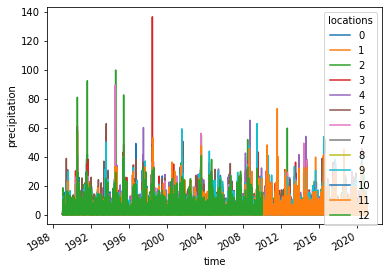

In [351]:
ds2.precipitation.plot.line(x="time")

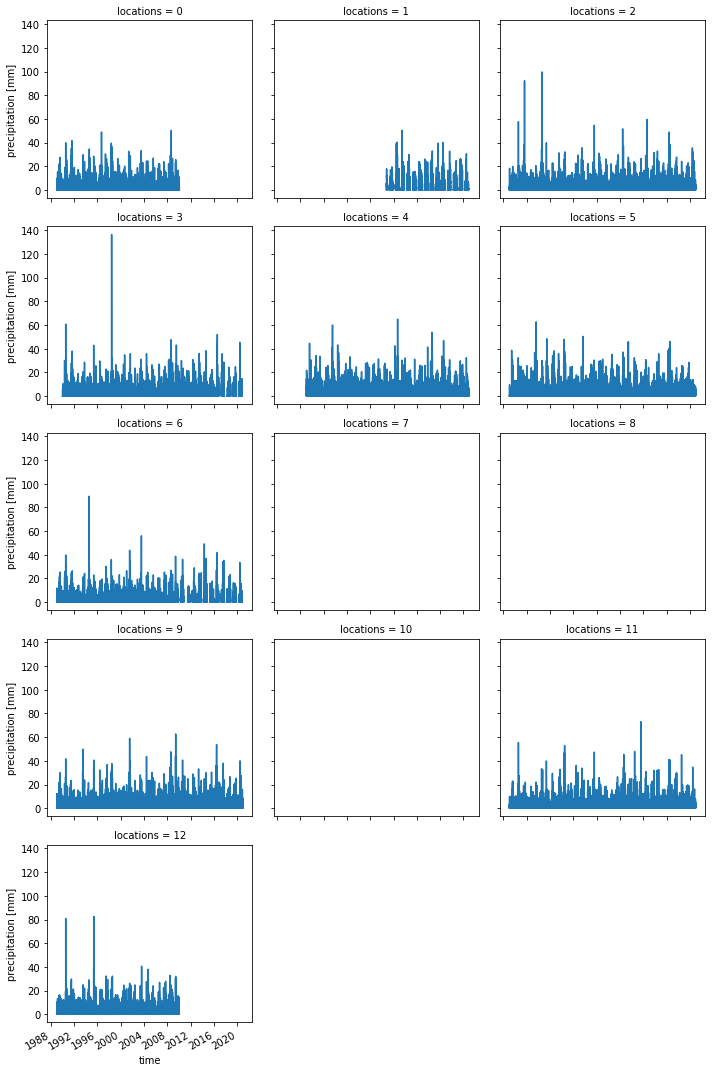

In [362]:
ds2.precipitation.attrs['units'] = "mm"
g_simple_line = ds2.precipitation.plot.line( x="time", col="locations", col_wrap=3 )

In [355]:
.coords

Coordinates:
  * locations  (locations) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 1987-01-01 1987-01-02 ... 2020-12-31

In [291]:
ds2.close()

In [292]:
del(ds2)